In [1]:
# Set the GPU growth to avoid the event "Failed to get convolution algorithm"

import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [2]:
from vgg16 import Vgg16

model = Vgg16(input_shape=(150, 150, 3), num_classes=1)

In [3]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 37, 37, 256)       295168

In [4]:
from keras.preprocessing.image import ImageDataGenerator


train_dir = '/home/mike/Documents/keras_vgg16_tf2/cats_and_dogs_small/train'
validation_dir = '/home/mike/Documents/keras_vgg16_tf2/cats_and_dogs_small/validation'
test_dir = '/home/mike/Documents/keras_vgg16_tf2/cats_and_dogs_small/test'


train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
# Compile the model 
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [6]:
# Train the model 
history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=30,
                    validation_data=validation_generator,
                    validation_steps=50,
                    verbose=2)

Epoch 1/30
100/100 - 16s - loss: 0.6935 - acc: 0.4970 - val_loss: 0.6918 - val_acc: 0.5000
Epoch 2/30
100/100 - 16s - loss: 0.6926 - acc: 0.5260 - val_loss: 0.6828 - val_acc: 0.5850
Epoch 3/30
100/100 - 16s - loss: 0.6811 - acc: 0.5580 - val_loss: 0.6787 - val_acc: 0.5350
Epoch 4/30
100/100 - 16s - loss: 0.6679 - acc: 0.5890 - val_loss: 0.6451 - val_acc: 0.6080
Epoch 5/30
100/100 - 16s - loss: 0.6613 - acc: 0.5950 - val_loss: 0.6445 - val_acc: 0.6140
Epoch 6/30
100/100 - 16s - loss: 0.6503 - acc: 0.6055 - val_loss: 0.6591 - val_acc: 0.5590
Epoch 7/30
100/100 - 16s - loss: 0.6438 - acc: 0.6190 - val_loss: 0.6464 - val_acc: 0.6120
Epoch 8/30
100/100 - 16s - loss: 0.6342 - acc: 0.6435 - val_loss: 0.6556 - val_acc: 0.5910
Epoch 9/30
100/100 - 16s - loss: 0.6382 - acc: 0.6285 - val_loss: 0.6163 - val_acc: 0.6510
Epoch 10/30
100/100 - 16s - loss: 0.6350 - acc: 0.6405 - val_loss: 0.6194 - val_acc: 0.6610
Epoch 11/30
100/100 - 16s - loss: 0.6236 - acc: 0.6585 - val_loss: 0.6749 - val_acc: 0.60

In [7]:
model.save('/home/mic/Documents/vgg16_tf2/cats_and_dogs_small_1.h5')

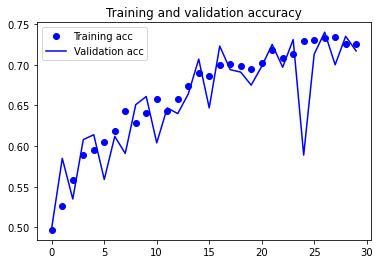

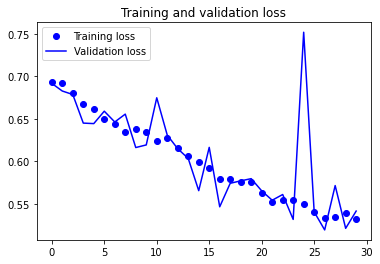

In [8]:
# Plot the diagram 

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()